## <Center>本节课知识点提炼</Center>

<!--  -->

### 本节课重点与难点
* 重点：卷积网络结构、参数计算、K折验证、局部链接、参数共享、fine turn
* 难点：参数计算、K折验证

### 1. 卷积神经网络 

#### 1).层级结构    
* 数据 输入层/Input layer   

    
* 卷积计算层/Conv layer   
  局部关联：每个神经元看做是一个filter  
  窗口滑动：filter对局部数据计算  
  输出大小计算公式：$\frac{W-F+2P}{S} + 1 $ ：F：卷积核大小，S:卷积步长  
  参数共享：每个神经元链接数据窗口的权重是固定的；同一个卷积核在整张特征层上卷积时其参数保持不变。  
  卷积：一组固定的权重和不同窗口内数据做内积  
  
* 激励层/Activation layer    
  把卷积层输出结果做非线性映射  
  常见的激活函数有：  
    * Sigmoid   
    * Tanh   
    * ReLU  
    * Leaky ReLU  
    * ELU  
    * Maxout   

* 池化层/Pooling layer   
   池化层在连续的卷积层之间、压缩数据和参数的量，减小过拟合.  
   Max Pooling: 取最大值   
   Average Pooling：取平均值  
   
* 全连接层/FC layer   
   两层之间所有神经元都有权重连接、通常全连接层在卷积神经网络尾部  
   典型的CNN结构为：
   INPUT -> [[CONV -> RELU]*N -> POOL?]*M -> [FC -> RELU]*K -> FC  
   
   
* Batch Normalization层(不是必须的)   
    使得模型训练收敛的速度更快、模型隐藏输出特征的分布更稳定，更利于模型的学习

#### 2).优缺点   
    
* 优点  
    共享卷积核，优化计算量;  
    无需手动选取特征，训练好权重，即得特征;  
    深层次的网络抽取图像信息丰富，表达效果好;   
* 缺点  
    需要调参，需要大样本量，GPU等硬件依赖；  
    物理含义不明确；  

<!--  -->

### 2. 局部连接与参数共享

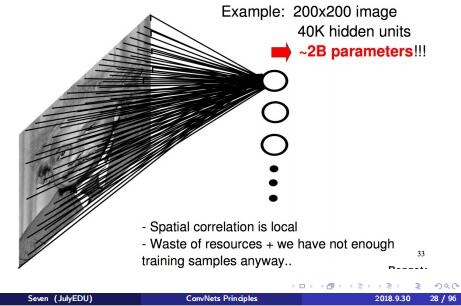

<Center>全连接</Center>

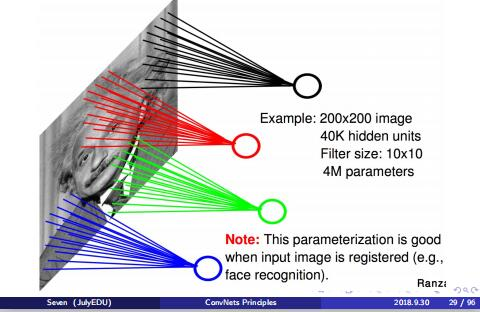

<Center>局部连接</Center>

 对于一个200 × 200的输入图像而言，如果下一个隐藏层的神经元数目为40K个，采用全连接则有200 × 200 × 40K 大约2B个权值参数，如此数目巨大的参数几乎难以训练；而采用局部连接，隐藏层的每个神经元仅与图像中10 × 10的局部图像相连接，那么此时的权值参数数量为10 × 10 × 40K = 4M，将直接减少几个数量级。

尽管减少了几个数量级，但参数数量依然较多。能不能再进一步减少呢？能！方法就是权值共享。具体做法是，在局部连接中隐藏层的每一个神经元连接的是一个10 × 10的局部图像，因此有10 × 10个权值参数，将这10 × 10个权值参数共享给剩下的神经元，也就是说隐藏层中40K个神经元的权值参数相同，那么此时不管隐藏层神经元的数目是多少，需要训练的参数就是这 10 × 10个权值参数（也就是卷积核的大小），如下图

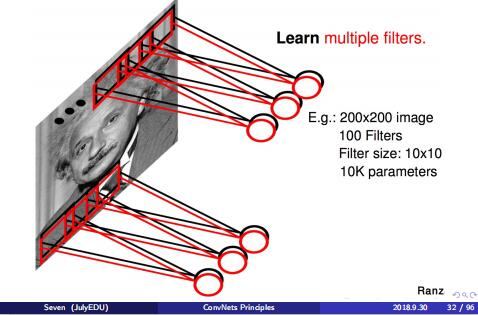

<Center>权值共享</Center>

 这就是CNN的一个神奇之处，尽管只有这么少的参数，依旧有出色的性能。但是，这样仅提取了图像的一种特征，如果要多提取出一些特征，可以增加多个卷积核，不同的卷积核能够得到图像的不同映射下的特征，称之为Feature Map。如果有100个卷积核，最终的权值参数也仅为100 x 10 x 10 = 10K个而已。另外，偏置参数也是共享的，同一种滤波器共享一个

<!--  -->

### 3.典型算法模型 

* LeNet，这是最早用于数字识别的CNN; [论文链接](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf)
* AlexNet，2012 ILSVRC比赛远超第2名的CNN，比LeNet更深，用多层小卷积层叠加替换单大卷积层; [论文链接](https://wmathor.com/usr/uploads/2019/05/3327542327.pdf)
* ZF Net，2013 ILSVRC比赛冠军;  [论文链接](https://arxiv.org/pdf/1311.2901.pdf)
* GoogLeNet，2014 ILSVRC比赛冠军;  [论文链接](https://arxiv.org/abs/1409.4842)
* VGGNet，2014 ILSVRC比赛中的模型，图像识别略差于GoogLeNet，但是在很多图像转化学习问题(比如object detection)上效果很好; [论文链接](https://arxiv.org/pdf/1409.1556.pdf)
* ResNet，2015ILSVRC比赛冠军，结构修正(残差学习)以适应深层次CNN训练; [论文链接](https://arxiv.org/abs/1512.03385)

### 4. 交叉验证

机器学习中有两种类型的模型参数:
* 模型自身参数: 通过样本学习得到的,不需要调整，如 权重W 偏置b
* 超参数:模型框架的参数，通常由手工设定，需要调整. 如正则化的系数$\lambda$

参数调整：
* 一个超参数: 直接通过交叉验证进行参数的选择;
* 多个超参数: 先用交叉验证评估模型的好坏，再用网格搜索选择最优参数.

K折交叉验证：
* 把把数据集分成若干份，依次取一份作为测试集其它份作为训练集进行训练，然后取所有的结果平均值作为此模型的结果。


下面以5这交叉验证为例：5折交叉验证就是把数据集分成5份，然后进行5次测试，如model1就是将第一折fold1的数据作为测试集，其余的四份作为训练集。最后每个model都计算出来一个准确度accuracy，然后求平均作为测试结果

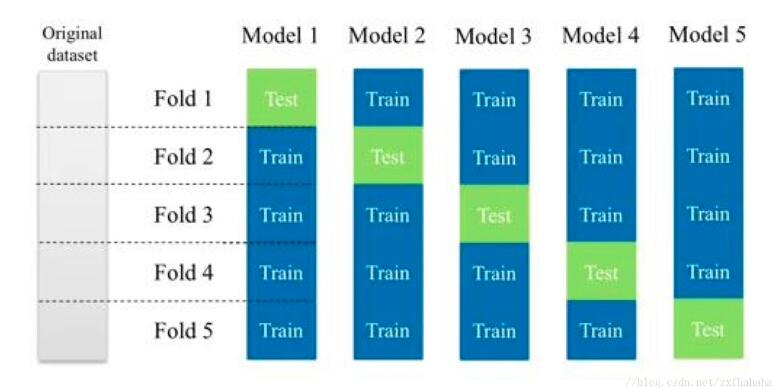

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [7]:
def create_data():
    iris = load_iris()
    df = pd.DataFrame(iris.data, columns=iris.feature_names)
    df['label'] = iris.target
    df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
#   取前100行：两种花 [0,1,-1]：第一列 第二列两个特征和最后一列label
    data = np.array(df.iloc[:100, [0,1,-1]])
#     返回特征和标签
    return data[:, :2], data[:, -1]

LogisticRegressionClassifier加入L2正则化

In [84]:
class LogisticRegressionClassifier(object):
    
    def __init__(self, max_iter=2000, learning_rate=0.001, lambda_=0.001):
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        self.loss_ls = []
        self.lambda_ = lambda_
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def data_matrix(self, X):
        data_mat = []
        for d in X:
            data_mat.append([ *d, 1])
        return data_mat
    
    def fit(self, X, y):
        data_mat = np.array(self.data_matrix(X))
        self.weights = np.zeros((data_mat.shape[-1], 1), dtype=np.float32)
        N = data_mat.shape[0]
        for iter_ in range(self.max_iter):
            
            y_hat = self.sigmoid(np.dot(data_mat, self.weights))
            loss = y.reshape(-1,1) - y_hat
            self.loss_ls.append(-loss.mean())
#             self.weights = self.weights +  self.learning_rate*np.dot(data_mat.T, loss)
            self.weights = self.weights*(1-self.lambda_*self.learning_rate) +  self.learning_rate*np.dot(data_mat.T, loss)
            
    def plot_loss(self):
        plt.plot(list(range(self.max_iter)), self.loss_ls)
        plt.show()
        
    def score(self, X_test, y_test):
        right = 0
        X_test = self.data_matrix(X_test)
        for x, y in zip(X_test, y_test):
            result = np.dot(x, self.weights)[0]
            if (result > 0 and y == 1) or (result < 0 and y == 0):
                right += 1
        return right / len(X_test)


* 构造5折交叉验证

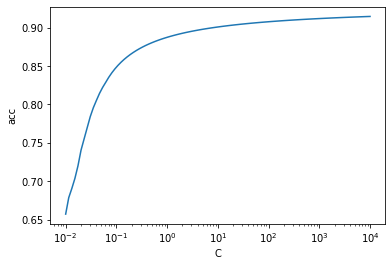

In [88]:
X, y = create_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, shuffle=True)
c_score = []
Cs=np.logspace(-2,4,num=100)
shape = X_train.shape[0]
Kfold = 5
score = []
for c in Cs:
    for k in range(Kfold):
        X_train_ = np.concatenate((X_train[0:k,], X_train[k+int(shape/Kfold):,]), axis=0) 
        y_train_ = np.concatenate((y_train[0:k], y_train[k+int(shape/Kfold):]), axis=0) 
        X_test_, y_test_ = X_train[k:k+int(shape/Kfold),], y_train[k:k+int(shape/Kfold)]
        lr_clf = LogisticRegressionClassifier(lambda_=float(1/c))
        lr_clf.fit(X_train_, y_train_)
        score.append(lr_clf.score(X_test_, y_test_))
    c_score.append(np.mean(score))
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(Cs,c_score)
ax.set_xscale('log')
ax.set_xlabel("C")
ax.set_ylabel("acc")
plt.show()




* 使用sklearn进行5折交叉验证

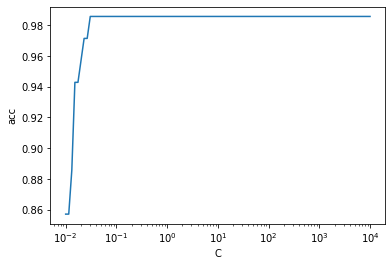

In [89]:
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
c_score = []
Cs=np.logspace(-2,4,num=100)
for c in Cs:
    lr = linear_model.LogisticRegression(C=c)
    score = cross_val_score(lr,X_train,y_train,cv=5,scoring='accuracy')
    c_score.append(score.mean())
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(Cs,c_score)
ax.set_xscale('log')
ax.set_xlabel("C")
ax.set_ylabel("acc")
plt.show()

<!--  -->

### 5. 实践
 请参考代码附件